<a href="https://colab.research.google.com/github/RomeroCruzJuanPablo/RomeroCruz-JuanPablo/blob/main/CodingTasks/CodingTask2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Science Fundamentals for DCBP, S. Haug, University of Bern 

# Coding Task 2

- Deadline (upload to Ilias): 2023-05-14 24:00
- Solutions in lecture on 2023-05-17
- Estimated effort: from 4 to 60 hours
- Images (data) on Ilias in the Data folder, the images.zip file
- Main notebook is number 11 for this task, however, also others may help you. You can also benefit a lot from googeling for code examples


## Subtasks (maximum 12.5 points)

- **CT-2.1** Upload the images to a folder on your google drive. Write a function which retrieves the filenames of the images, contains a loop converting them to png images and saves them. [about 1 hour] [max 3 points] 
-**CT-2.2** With some filtering and sthresholding, write a function which converts the colored bins into nice white segments on a black background for one image. [about 1 hour][max 3 points] 
- **CT-2.3** Write an algorithm which counts the number of bins. First approach could be a "sliding window" algorithm, i.e a loop sliding over the image and counting regions with substantial white content. There may also be nice segmentation tools out "there" already. You may google. [about 4 hours][max 3 points] 
- **CT-2.4** Write an algorithm which does the latter task on all images. As the images are quite different, this is a large task which goes beyond the time budget of this exercise, however, you can give it a try. If it works out for a couple of images, that is already good. [from 4 to 50 hours][max 3.5 points]

Work in teams and have fun ! 

In [1]:
!pip install pyheif
import pyheif

import numpy as np
import matplotlib.pyplot as plt
import skimage.io as io
import skimage.filters as skf
import skimage.morphology as skm
import os


from PIL import Image

from google.colab import drive
drive.mount('/content/drive')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#**CT-2.1**
Upload the images to a folder on your google drive. Write a function which retrieves the filenames of the images, contains a loop converting them to png images and saves them. [about 1 hour] [max 3 points]

In [2]:
#This function transforms all the files in a folder to png
#The input is only the url to the folder
def files_to_png(url):
  file_names = os.listdir(url)
  new_names=[]
  for url_name in file_names:
    try:
      with open(url +url_name, 'rb') as f:
        heif_file = pyheif.read_heif(f)
        image = Image.frombytes(heif_file.mode, heif_file.size, heif_file.data, "raw", heif_file.mode)
    except:
      continue
    url_name = url_name.split('.')[0] + '.png'
    image.save(url_name, format="png")
    new_names.append(url_name)
  return new_names

In [3]:
url_pre = '/content/drive/MyDrive/Colab Notebooks/DSfCB/Images/'
png_f = files_to_png(url_pre)

#**CT-2.2** 
With some filtering and thresholding, write a function which converts the colored bins into nice white segments on a black background for one image. [about 1 hour][max 3 points]

In [4]:
def image_cleansing(png,xliminf, xlimsup,yliminf, ylimsup):
  imageRGB  = io.imread(png)
  image = imageRGB[:,:,2]
  
  #Cut for lower part
  image = image[image.shape[0]//2:image.shape[0],:]
  

  #FILTERING
  image_mean = skf.median(image,selem=skm.disk(20))
  
  
  #THRESHOKDING
  threshold_manual = 60
  
  #create a mask using a logical operation
  image_threshold = image_mean<threshold_manual
  

  #show plots changes
  plt.imshow(image, cmap ='gray')
  plt.show()
  plt.imshow(image_mean, cmap ='gray')
  plt.show()
  plt.imshow(image_threshold, cmap ='gray')
  plt.show()
  plt.imshow(image_threshold, cmap ='gray')
  plt.xlim(xliminf, xlimsup)
  plt.ylim(yliminf, ylimsup)
  plt.show()

  return image_threshold

<ipython-input-4-0a5e6419a7d0>:10: FutureWarning: `selem` is a deprecated argument name for `median`. It will be removed in version 1.0. Please use `footprint` instead.
  image_mean = skf.median(image,selem=skm.disk(20))


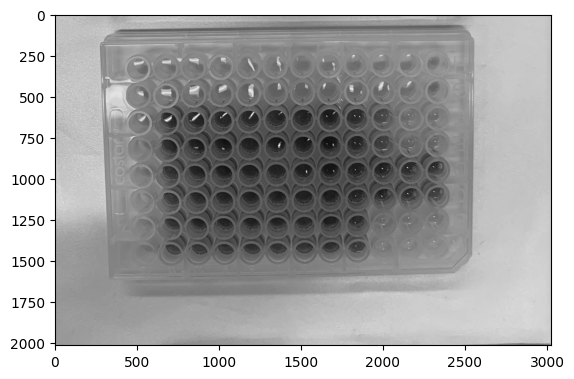

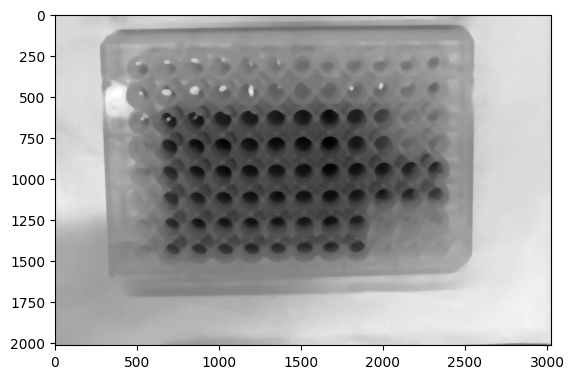

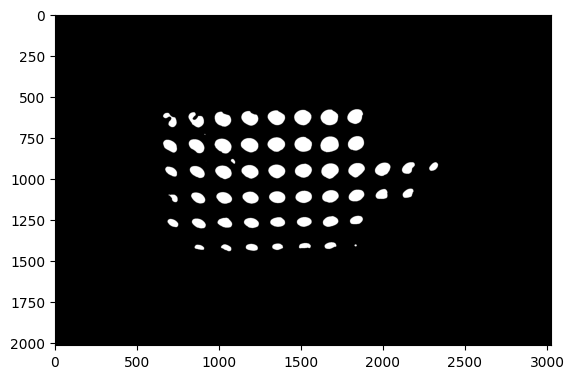

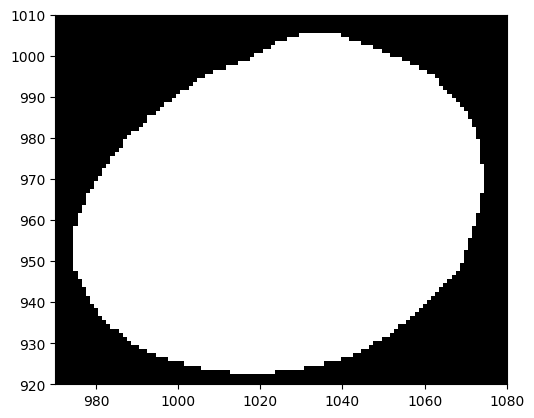

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [5]:
clean =image_cleansing(png_f[4],970,1080,920,1010)
clean

- Para png_f[4] se contaron 51 cuadros blancos manualmente.

#**CT-2.3** 
Write an algorithm which counts the number of bins. First approach could be a "sliding window" algorithm, i.e a loop sliding over the image and counting regions with substantial white content. There may also be nice segmentation tools out "there" already. You may google. [about 4 hours][max 3 points] 

In [6]:
def count_white_bins(image, window_size, stride, threshold):
    # Initialize counter variable
    count = 0
    
    # Loop over image using sliding window algorithm
    for i in range(0, image.shape[0] - window_size[0] + 1, stride):
        for j in range(0, image.shape[1] - window_size[1] + 1, stride):
            # Extract current window
            window = image[i:i+window_size[0], j:j+window_size[1]]
            
            # Compute sum of pixel values in window
            window_sum = np.sum(window)
            
            # Check if sum is greater than threshold
            if window_sum > threshold:
                count += 1
                
    return count

In [7]:
count_white_bins(clean,(100,100),60,3600)

57

#**CT-2.4** 
Write an algorithm which does the latter task on all images. As the images are quite different, this is a large task which goes beyond the time budget of this exercise, however, you can give it a try. If it works out for a couple of images, that is already good. [from 4 to 50 hours][max 3.5 points]

In [8]:
def image_cleansing(png):
  imageRGB  = io.imread(png)
  image = imageRGB[:,:,2]
  
  #Cut for lower part
  image = image[image.shape[0]//2:image.shape[0],:]
  

  #FILTERING
  image_mean = skf.median(image,selem=skm.disk(20))
  
  
  #THRESHOKDING
  threshold_manual = 60
  
  #create a mask using a logical operation
  image_threshold = image_mean<threshold_manual

  return image_threshold



cleaned=[]
for i in png_f:
  clean =image_cleansing(i)
  cleaned.append(clean)

bins=[]
for j in cleaned:
  number=count_white_bins(j,(100,100),60,3600)
  bins.append(number)

print(bins)

<ipython-input-8-aa2e37552598>:10: FutureWarning: `selem` is a deprecated argument name for `median`. It will be removed in version 1.0. Please use `footprint` instead.
  image_mean = skf.median(image,selem=skm.disk(20))


[75, 54, 1, 30, 57, 57, 4, 77, 42, 21, 51, 44, 43, 37, 40]


In [12]:

for i,j in zip(png_f, bins):
  print('In ' + str(i) + ' there are '+ str(j)+' coloured bins')

In IMG_5382.png there are 75 coloured bins
In IMG_5384.png there are 54 coloured bins
In IMG_5392.png there are 1 coloured bins
In IMG_5390.png there are 30 coloured bins
In IMG_5389.png there are 57 coloured bins
In IMG_5379.png there are 57 coloured bins
In IMG_5391.png there are 4 coloured bins
In IMG_5381.png there are 77 coloured bins
In IMG_5388.png there are 42 coloured bins
In IMG_5393.png there are 21 coloured bins
In IMG_5383.png there are 51 coloured bins
In IMG_5380.png there are 44 coloured bins
In IMG_5386.png there are 43 coloured bins
In IMG_5387.png there are 37 coloured bins
In IMG_5385.png there are 40 coloured bins
